In [7]:
import pandas as pd
df=pd.read_csv("emotion.csv")
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [5]:
df.shape

(16000, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [10]:
df.label.value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

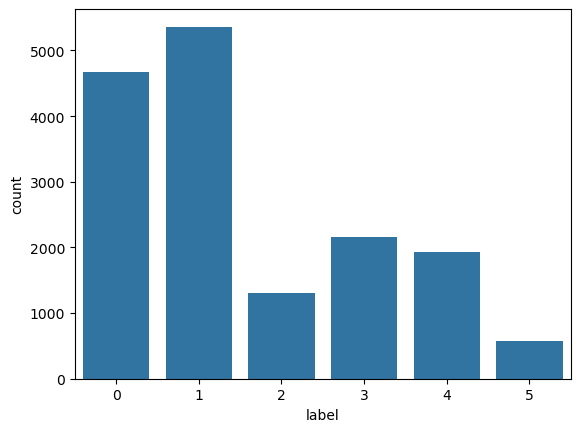

In [11]:
import seaborn as sns
sns.countplot(x=df.label)

In [12]:
df.isna().sum()

text     0
label    0
dtype: int64

# Text Processing

In [13]:
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.stem import WordNetLemmatizer
from textblob import word
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [19]:
!pip install textblob

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text'].head()

0                                didnt feel humiliated
1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
Name: text, dtype: object

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(df['text'])
x=x.toarray()
y=df.label.values

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,
                                                 test_size=0.2,shuffle=True)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model = model.fit(X_train,y_train)
pred = model.predict(X_test)

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model = model.fit(x_train,y_train)
pred = model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
print(confusion_matrix(y_test,pred))

[[305 117 115 150 162  56]
 [178 409 176 101 126  63]
 [ 53  60  99  17  29  13]
 [ 80  97  46 146  57  33]
 [ 87  69  36  33 141  31]
 [ 20  19   8   7  21  40]]


In [34]:
print(accuracy_score(y_test, pred))

0.35625


In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.42      0.34      0.37       905
           1       0.53      0.39      0.45      1053
           2       0.21      0.37      0.26       271
           3       0.32      0.32      0.32       459
           4       0.26      0.36      0.30       397
           5       0.17      0.35      0.23       115

    accuracy                           0.36      3200
   macro avg       0.32      0.35      0.32      3200
weighted avg       0.40      0.36      0.37      3200



In [38]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train,y_train)
rf_pred=clf_rf.predict(x_test).astype(int)

In [ ]:
print(confusion_matrix(y_test, rf_pred))

In [ ]:
print(accuracy_score(y_test, rf_pred))

In [ ]:
print(classification_report(y_test, rf_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_test)
lr_pred = logreg.predic(x_test)

In [ ]:
print(confusion_matrix(y_test, lr_pred))

In [ ]:
print(classification_report(y_test, lr_pred))

In [ ]:
print(accuracy_score(y_test, lr_pred))

# Conclusion

# Random Forest Model has proved better with the accuracy 88% when compared to other two models.